In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
df = pd.read_csv("../data/visa_data.csv", encoding="latin1")
df.head()

,applicant_id,age,nationality,current_residence,marital_status,dependents,education_level,occupation,work_experience_years,sponsorship_status,...,purpose_of_travel,intended_duration,travel_history,target_country,visa_category_(label),previous_visa_rejections,criminal_record_check,medical_exam_status,document_completeness_score,visa_fee_payment_status
0,C71788,24,Australia,Philippines,Single,3,High School,Farmer,8,University Admission,...,Tourism,Long-term,Previous Visa,US,Visitor,0,Clear,Passed,62,Paid
1,C67219,24,Paraguay,Chile,Single,4,PhD,Driver,30,Job Offer,...,Tourism,Long-term,Previous Visa,Australia,Visitor,2,Clear,Passed,75,Paid
2,C54067,51,Colombia,Netherlands,Married,4,High School,Chef,24,Job Offer,...,PR,Permanent,Previous Visa,US,PR,1,Clear,Passed,96,Paid
3,C07169,54,Algeria,South Korea,Divorced,1,High School,Artist,34,Job Offer,...,Study,Long-term,Clean,UK,Student,0,Clear,Passed,75,Paid
4,C29619,34,Guatemala,Ghana,Single,1,High School,Nurse,10,Job Offer,...,Work,Short-term,Previous Visa,Germany,Work,0,Clear,Passed,64,Paid


In [4]:
print(df.head())
print(df.info())
print(df.isnull().sum())


  applicant_id age nationality current_residence marital_status dependents  \
0       C71788  24   Australia       Philippines         Single          3   
1       C67219  24    Paraguay             Chile         Single          4   
2       C54067  51    Colombia       Netherlands        Married          4   
3       C07169  54     Algeria       South Korea       Divorced          1   
4       C29619  34   Guatemala             Ghana         Single          1   

  education_level occupation work_experience_years    sponsorship_status  ...  \
0     High School     Farmer                     8  University Admission  ...   
1             PhD     Driver                    30             Job Offer  ...   
2     High School       Chef                    24             Job Offer  ...   
3     High School     Artist                    34             Job Offer  ...   
4     High School      Nurse                    10             Job Offer  ...   

  purpose_of_travel intended_duration travel

In [5]:
def duration_to_months(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).lower()
    
    if "year" in value:
        return float(value.split()[0]) * 12
    elif "month" in value:
        return float(value.split()[0])
    elif "day" in value:
        return float(value.split()[0]) / 30
    else:
        return np.nan

df["intended_duration_months"] = df["intended_duration"].apply(duration_to_months)

In [6]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")

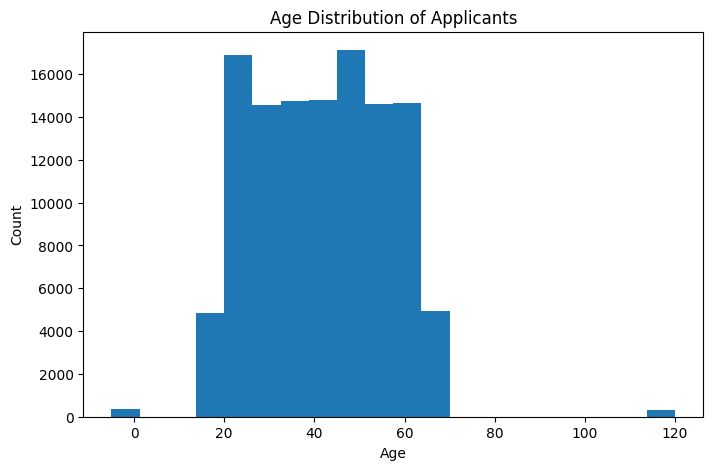

In [7]:
plt.hist(df["age"].dropna(), bins=20)
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


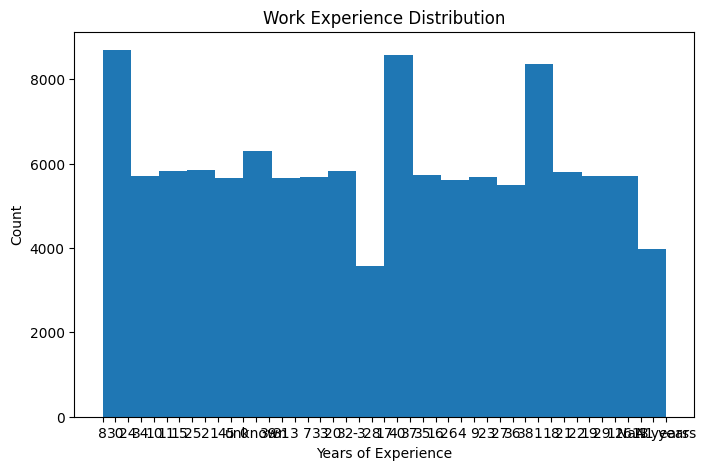

In [8]:
plt.hist(df["work_experience_years"].dropna(), bins=20)
plt.title("Work Experience Distribution")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.show()

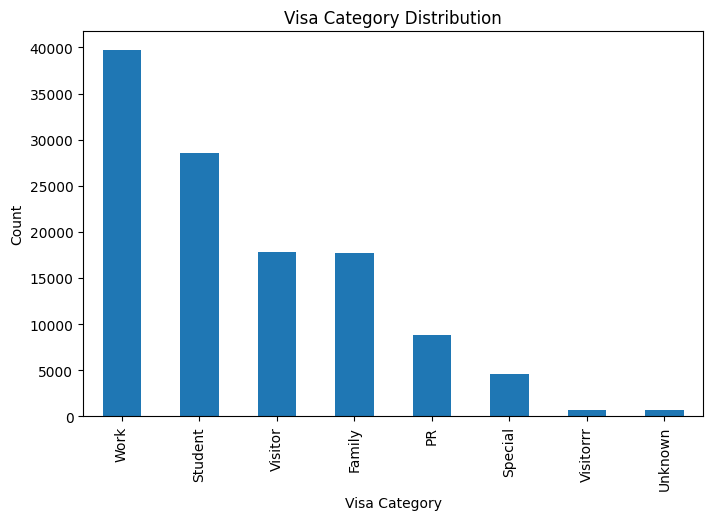

In [9]:
df["visa_category_(label)"].value_counts().plot(kind="bar")
plt.title("Visa Category Distribution")
plt.xlabel("Visa Category")
plt.ylabel("Count")
plt.show()

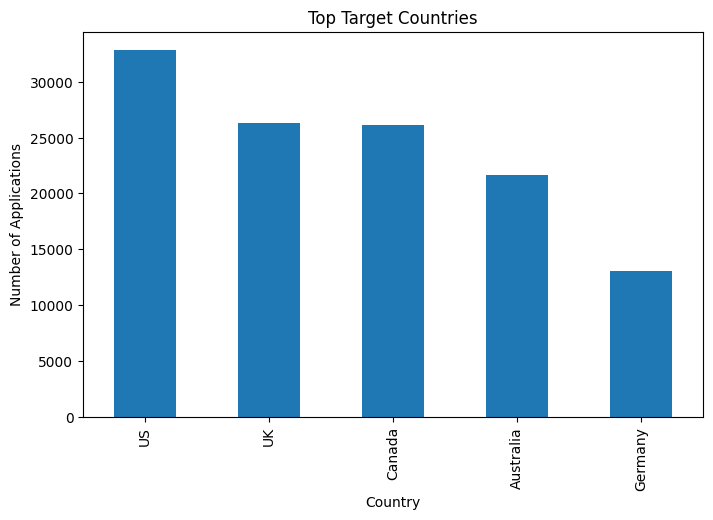

In [10]:
df["target_country"].value_counts().head(10).plot(kind="bar")
plt.title("Top Target Countries")
plt.xlabel("Country")
plt.ylabel("Number of Applications")
plt.show()


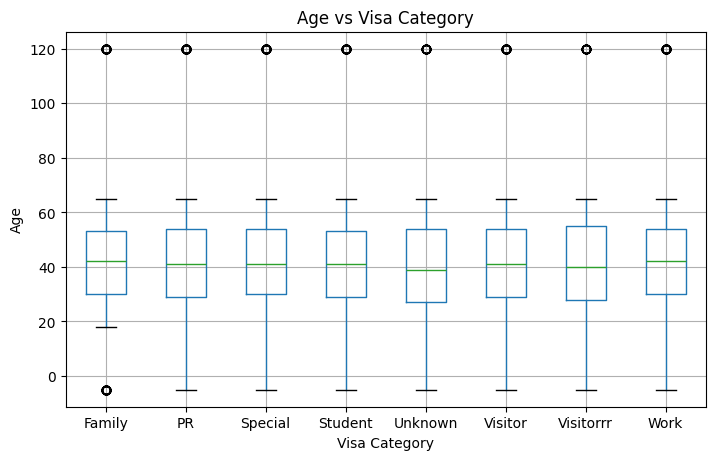

In [11]:
df.boxplot(column="age", by="visa_category_(label)")
plt.title("Age vs Visa Category")
plt.suptitle("")
plt.xlabel("Visa Category")
plt.ylabel("Age")
plt.show()

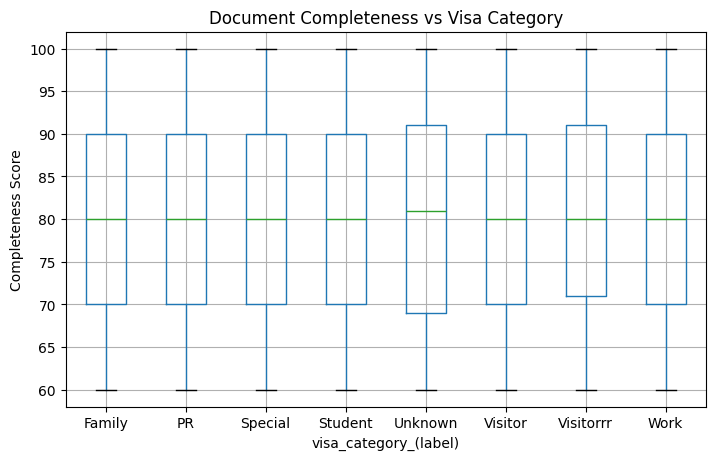

In [12]:
df.boxplot(column="document_completeness_score", by="visa_category_(label)")
plt.title("Document Completeness vs Visa Category")
plt.suptitle("")
plt.ylabel("Completeness Score")
plt.show()

In [13]:
numeric_cols = [
    "age",
    "work_experience_years",
    "previous_visa_rejections",
    "document_completeness_score",
    "intended_duration"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [14]:
country_avg_experience = (
    df.groupby("target_country", as_index=False)["work_experience_years"]
      .mean()
      .rename(columns={"work_experience_years": "avg_experience_by_country"})
)

In [15]:
df = df.merge(
    country_avg_experience,
    on="target_country",
    how="left"
)

In [16]:
df["risk_score"] = (
    df["previous_visa_rejections"].fillna(0)
    + (1 - df["document_completeness_score"].fillna(0))
)

In [17]:
df.fillna({
    "age": df["age"].median(),
    "work_experience_years": df["work_experience_years"].median(),
    "avg_experience_by_country": df["avg_experience_by_country"].median(),
    "intended_duration": df["intended_duration"].median()
}, inplace=True)

,applicant_id,age,nationality,current_residence,marital_status,dependents,education_level,occupation,work_experience_years,sponsorship_status,...,target_country,visa_category_(label),previous_visa_rejections,criminal_record_check,medical_exam_status,document_completeness_score,visa_fee_payment_status,intended_duration_months,avg_experience_by_country,risk_score
0,C71788,24.0,Australia,Philippines,Single,3,High School,Farmer,8.0,University Admission,...,US,Visitor,0,Clear,Passed,62,Paid,NaN,19.810019,-61
1,C67219,24.0,Paraguay,Chile,Single,4,PhD,Driver,30.0,Job Offer,...,Australia,Visitor,2,Clear,Passed,75,Paid,NaN,19.867800,-72
2,C54067,51.0,Colombia,Netherlands,Married,4,High School,Chef,24.0,Job Offer,...,US,PR,1,Clear,Passed,96,Paid,NaN,19.810019,-94
3,C07169,54.0,Algeria,South Korea,Divorced,1,High School,Artist,34.0,Job Offer,...,UK,Student,0,Clear,Passed,75,Paid,NaN,19.902000,-74
4,C29619,34.0,Guatemala,Ghana,Single,1,High School,Nurse,10.0,Job Offer,...,Germany,Work,0,Clear,Passed,64,Paid,NaN,19.680856,-63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,A00143,57.0,Germany,Oman,Married,5,Master,Sales,37.0,NaN,...,US,PR,0,Clear,Pending,78,Paid,NaN,19.810019,-77
119996,A09754,26.0,Malaysia,Kuwait,Married,5,Bachelor,Sales,20.0,University Admission,...,Germany,PR,0,Clear,Passed,88,Paid,NaN,19.680856,-87
119997,C103695,42.0,UAE,Kenya,Single,2,High School,Engineer,39.0,Job Offer,...,US,Family,0,Clear,Passed,71,Paid,NaN,19.810019,-70
119998,C00861,22.0,Italy,Poland,Single,4,High School,Manager,10.0,University Admission,...,US,Work,0,Clear,Pending,64,Paid,NaN,19.810019,-63


In [18]:
print(df.columns)

Index(['applicant_id', 'age', 'nationality', 'current_residence',
       'marital_status', 'dependents', 'education_level', 'occupation',
       'work_experience_years', 'sponsorship_status', 'financial_status',
       'language_proficiency', 'purpose_of_travel', 'intended_duration',
       'travel_history', 'target_country', 'visa_category_(label)',
       'previous_visa_rejections', 'criminal_record_check',
       'medical_exam_status', 'document_completeness_score',
       'visa_fee_payment_status', 'intended_duration_months',
       'avg_experience_by_country', 'risk_score'],
      dtype='str')
